In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats as stats
import math
import sys

sys.path.append("./markdown.py")
import markdown as md

from matplotlib import style
from matplotlib.pyplot import figure
style.use('ggplot')
plt_height = 7
plt_length = 18

md_head = ['I[A]', 'U[V]', 'Time', 'R[Ω]']
md_fields = [0, 1, 2, 3]
md_align = [('>', '>'), ('>', '>'), ('>', '>'), ('>', '>')]

In [48]:
Ix = [4.90, 7.97, 11.9, 16.46, 20.15, 25.03, 29.96, 35.03, 39.58, 44.79]
Ux = [2.27, 2.46, 2.86, 3.22, 3.45, 3.75, 3.86, 3.93, 4.02, 4.15]
tx = ["08:57", "05:10", "3:27", "2:36", "2:2", "1:39", "1:13", "01:00", "0:50", "0:42"]
    
    
lx = len(tx)
secx = np.zeros(lx)

for i in range(lx):
    secx[i] = sum([a * b for a,b in zip([60,1], map(int,tx[i].split(':')))])

Rx = [a / b for a, b in zip(Ux, Ix)]
Px = [a * b for a, b in zip(Ix, Ux)]
Wx = [a * b for a, b in zip(Px, secx)]

array = [0 for i in range(lx)] 
for i in range(lx):
    array[i] = [Ix[i], Ux[i], tx[i], round(Rx[i], 3)]

md.table(sys.stdout, array, md_fields, md_head, md_align)

|  I[A] | U[V] |  Time |  R[Ω] |
| ----: | ---: | ----: | ----: |
|   4.9 | 2.27 | 08:57 | 0.463 |
|  7.97 | 2.46 | 05:10 | 0.309 |
|  11.9 | 2.86 |  3:27 |  0.24 |
| 16.46 | 3.22 |  2:36 | 0.196 |
| 20.15 | 3.45 |   2:2 | 0.171 |
| 25.03 | 3.75 |  1:39 |  0.15 |
| 29.96 | 3.86 |  1:13 | 0.129 |
| 35.03 | 3.93 | 01:00 | 0.112 |
| 39.58 | 4.02 |  0:50 | 0.102 |
| 44.79 | 4.15 |  0:42 | 0.093 |


In [49]:
I0 = [3.900, 5.010, 6.979, 7.599, 8.679, 10.23, 12.13, 13.70, 15.16]
U0 = [6.530, 7.330, 8.919, 9.129, 9.699, 10.32, 11.38, 12.11, 12.49]
t0 = ["11:10", "08:30", "05:52", "05:11", "04:20", "03:46", "03:09", "02:38", "02:31"]
l0 = len(t0)
sec0 = np.zeros(l0)

for i in range(l0):
    sec0[i] = sum([a * b for a,b in zip([60,1], map(int,t0[i].split(':')))])

R0 = [a / b for a, b in zip(U0, I0)]
P0 = [a * b for a, b in zip(I0, U0)]
W0 = [a * b for a, b in zip(P0, sec0)]

array = [0 for i in range(l0)] 
for i in range(l0):
    array[i] = [I0[i], U0[i], t0[i], round(R0[i], 3)]

md.table(sys.stdout, array, md_fields, md_head, md_align)

|  I[A] |  U[V] |  Time |  R[Ω] |
| ----: | ----: | ----: | ----: |
|   3.9 |  6.53 | 11:10 | 1.674 |
|  5.01 |  7.33 | 08:30 | 1.463 |
| 6.979 | 8.919 | 05:52 | 1.278 |
| 7.599 | 9.129 | 05:11 | 1.201 |
| 8.679 | 9.699 | 04:20 | 1.118 |
| 10.23 | 10.32 | 03:46 | 1.009 |
| 12.13 | 11.38 | 03:09 | 0.938 |
|  13.7 | 12.11 | 02:38 | 0.884 |
| 15.16 | 12.49 | 02:31 | 0.824 |


In [50]:
I2 = [4.05, 5.57, 8.08, 11.19, 14.83, 16.70, 20.46, 23.52, 28.73, 33.76, 39.47, 47.50, 54.5, 67.3, 82.90]
U2 = [3.82,3.92,4.12,4.30,4.54, 4.62, 4.97, 5.15,5.66, 5.87, 6.18, 6.58, 6.93, 7.53, 8.44]
t2 = ["10:10", "08:12", "05:00" , "03:32", "02:30", "02:13", "01:48", "01:34", "01:17", "01:06", "00:56", "00:46", "00:42", "00:33", "00:27"]
l2 = len(t2)
sec2 = np.zeros(l2)

for i in range(l2):
    sec2[i] = sum([a * b for a,b in zip([60,1], map(int,t2[i].split(':')))])

R2 = [a / b for a, b in zip(U2, I2)]
P2 = [a * b for a, b in zip(I2, U2)]
W2 = [a * b for a, b in zip(P2, sec2)]

array = [0 for i in range(l2)] 
for i in range(l2):
    array[i] = [I2[i], U2[i], t2[i], round(R2[i], 3)]

md.table(sys.stdout, array, md_fields, md_head, md_align)

|  I[A] | U[V] |  Time |  R[Ω] |
| ----: | ---: | ----: | ----: |
|  4.05 | 3.82 | 10:10 | 0.943 |
|  5.57 | 3.92 | 08:12 | 0.704 |
|  8.08 | 4.12 | 05:00 |  0.51 |
| 11.19 |  4.3 | 03:32 | 0.384 |
| 14.83 | 4.54 | 02:30 | 0.306 |
|  16.7 | 4.62 | 02:13 | 0.277 |
| 20.46 | 4.97 | 01:48 | 0.243 |
| 23.52 | 5.15 | 01:34 | 0.219 |
| 28.73 | 5.66 | 01:17 | 0.197 |
| 33.76 | 5.87 | 01:06 | 0.174 |
| 39.47 | 6.18 | 00:56 | 0.157 |
|  47.5 | 6.58 | 00:46 | 0.139 |
|  54.5 | 6.93 | 00:42 | 0.127 |
|  67.3 | 7.53 | 00:33 | 0.112 |
|  82.9 | 8.44 | 00:27 | 0.102 |


In [51]:
I2 = [4.05, 5.57, 8.08, 11.19, 14.83, 16.70, 20.46, 23.52, 28.73, 33.76, 39.47, 47.50, 54.5, 67.3, 82.90]
U2 = [3.82,3.92,4.12,4.30,4.54, 4.62, 4.97, 5.15,5.66, 5.87, 6.18, 6.58, 6.93, 7.53, 8.44]
t2 = ["10:10", "08:12", "05:00" , "03:32", "02:30", "02:13", "01:48", "01:34", "01:17", "01:06", "00:56", "00:46", "00:42", "00:33", "00:27"]
l2 = len(t2)
sec2 = np.zeros(l2)

for i in range(l2):
    sec2[i] = sum([a * b for a,b in zip([60,1], map(int,t2[i].split(':')))])

R2 = [a / b for a, b in zip(U2, I2)]
P2 = [a * b for a, b in zip(I2, U2)]
W2 = [a * b for a, b in zip(P2, sec2)]

array = [0 for i in range(l2)] 
for i in range(l2):
    array[i] = [I2[i], U2[i], t2[i], round(R2[i], 3)]

md.table(sys.stdout, array, md_fields, md_head, md_align)

|  I[A] | U[V] |  Time |  R[Ω] |
| ----: | ---: | ----: | ----: |
|  4.05 | 3.82 | 10:10 | 0.943 |
|  5.57 | 3.92 | 08:12 | 0.704 |
|  8.08 | 4.12 | 05:00 |  0.51 |
| 11.19 |  4.3 | 03:32 | 0.384 |
| 14.83 | 4.54 | 02:30 | 0.306 |
|  16.7 | 4.62 | 02:13 | 0.277 |
| 20.46 | 4.97 | 01:48 | 0.243 |
| 23.52 | 5.15 | 01:34 | 0.219 |
| 28.73 | 5.66 | 01:17 | 0.197 |
| 33.76 | 5.87 | 01:06 | 0.174 |
| 39.47 | 6.18 | 00:56 | 0.157 |
|  47.5 | 6.58 | 00:46 | 0.139 |
|  54.5 | 6.93 | 00:42 | 0.127 |
|  67.3 | 7.53 | 00:33 | 0.112 |
|  82.9 | 8.44 | 00:27 | 0.102 |


In [52]:
I5 = [4.18, 5.07, 6.62, 8.40, 10.15, 12.47, 16.13, 19.15, 22.14, 25.09, 29.09, 34.68, 39.83, 45.80, 52.90, 61.80, 71.70, 82.20]
U5 = [3.70, 3.75, 3.81, 3.87, 3.92, 3.99, 4.10, 4.16, 4.24, 4.31, 4.39, 4.52, 4.63, 4.76, 4.93, 5.09, 5.30, 5.51]
t5 = ["13:42", "09:35", "06:22", "04:52", "04:00", "03:09", "02:22", "01:59", "01:44", "01:31", "01:17", "01:05", "00:56", "00:48", "00:41", "00:36", "00:30", "00:26"]

l5 = len(t5)
sec5 = np.zeros(l5)

for i in range(l5):
    sec5[i] = sum([a * b for a,b in zip([60,1], map(int,t5[i].split(':')))])

R5 = [a / b for a, b in zip(U5, I5)]
P5 = [a * b for a, b in zip(I5, U5)]
W5 = [a * b for a, b in zip(P5, sec5)]

array = [0 for i in range(l5)] 
for i in range(l5):
    array[i] = [I5[i], U5[i], t5[i], round(R5[i], 3)]

md.table(sys.stdout, array, md_fields, md_head, md_align)

|  I[A] | U[V] |  Time |  R[Ω] |
| ----: | ---: | ----: | ----: |
|  4.18 |  3.7 | 13:42 | 0.885 |
|  5.07 | 3.75 | 09:35 |  0.74 |
|  6.62 | 3.81 | 06:22 | 0.576 |
|   8.4 | 3.87 | 04:52 | 0.461 |
| 10.15 | 3.92 | 04:00 | 0.386 |
| 12.47 | 3.99 | 03:09 |  0.32 |
| 16.13 |  4.1 | 02:22 | 0.254 |
| 19.15 | 4.16 | 01:59 | 0.217 |
| 22.14 | 4.24 | 01:44 | 0.192 |
| 25.09 | 4.31 | 01:31 | 0.172 |
| 29.09 | 4.39 | 01:17 | 0.151 |
| 34.68 | 4.52 | 01:05 |  0.13 |
| 39.83 | 4.63 | 00:56 | 0.116 |
|  45.8 | 4.76 | 00:48 | 0.104 |
|  52.9 | 4.93 | 00:41 | 0.093 |
|  61.8 | 5.09 | 00:36 | 0.082 |
|  71.7 |  5.3 | 00:30 | 0.074 |
|  82.2 | 5.51 | 00:26 | 0.067 |


In [53]:
I10 = [4.35, 5.36, 6.63, 7.99, 10.38, 12.09, 14.02, 17.00, 20.79, 25.60, 30.30, 36.09, 41.60, 50.50, 61.7, 73.5]
U10 = [3.47, 3.59, 3.67, 3.74, 3.81, 3.85, 3.91, 3.97, 4.06, 4.15, 4.23, 4.33, 4.42, 4.57, 4.74, 4.90]
t10 = ["15:54", "09:59", "07:26", "05:48", "04:15", "03:32", "03:02", "02:25", "01:57", "01:34", "01:17", "01:04", "00:54", "00:44", "00:36", "00:28"] 

l10 = len(t10)
sec10 = np.zeros(l10)

for i in range(l10):
    sec10[i] = sum([a * b for a,b in zip([60,1], map(int,t10[i].split(':')))])

R10 = [a / b for a, b in zip(U10, I10)]
P10 = [a * b for a, b in zip(I10, U10)]
W10 = [a * b for a, b in zip(P10, sec10)]

array = [0 for i in range(l10)] 
for i in range(l10):
    array[i] = [I10[i], U10[i], t10[i], round(R10[i], 3)]

md.table(sys.stdout, array, md_fields, md_head, md_align)

|  I[A] | U[V] |  Time |  R[Ω] |
| ----: | ---: | ----: | ----: |
|  4.35 | 3.47 | 15:54 | 0.798 |
|  5.36 | 3.59 | 09:59 |  0.67 |
|  6.63 | 3.67 | 07:26 | 0.554 |
|  7.99 | 3.74 | 05:48 | 0.468 |
| 10.38 | 3.81 | 04:15 | 0.367 |
| 12.09 | 3.85 | 03:32 | 0.318 |
| 14.02 | 3.91 | 03:02 | 0.279 |
|  17.0 | 3.97 | 02:25 | 0.234 |
| 20.79 | 4.06 | 01:57 | 0.195 |
|  25.6 | 4.15 | 01:34 | 0.162 |
|  30.3 | 4.23 | 01:17 |  0.14 |
| 36.09 | 4.33 | 01:04 |  0.12 |
|  41.6 | 4.42 | 00:54 | 0.106 |
|  50.5 | 4.57 | 00:44 |  0.09 |
|  61.7 | 4.74 | 00:36 | 0.077 |
|  73.5 |  4.9 | 00:28 | 0.067 |


In [54]:
I20 = [4.71, 5.46, 6.55, 7.85, 10.01, 12.07, 14.03, 17.13, 20.08, 23.15, 26.19, 30.09, 34.11, 39.85, 45.2, 50.3, 60.2, 69.9, 80.5]
U20 = [2.99, 3.23, 3.44, 3.59, 3.69, 3.77, 3.82, 3.89, 3.95, 4.01, 4.06, 4.11, 4.18, 4.26,  4.34, 4.415, 4.55, 4.69, 4.83 ]
t20 = ["17:28", "14:12", "11:07", "08:19", "05:58", "04:27", "03:36", "02:54", "02:18", "01:56", "01:41", "01:25", "01:12", "01:02", "00:53", "00:46", "00:38", "00:33", "00:28"] 

l20 = len(t20)
sec20 = np.zeros(l20)

for i in range(l20):
    sec20[i] = sum([a * b for a,b in zip([60,1], map(int,t20[i].split(':')))])

R20 = [a / b for a, b in zip(U20, I20)]
P20 = [a * b for a, b in zip(I20, U20)]
W20 = [a * b for a, b in zip(P20, sec20)]

array = [0 for i in range(l20)] 
for i in range(l20):
    array[i] = [I20[i], U20[i], t20[i], round(R20[i], 3)]

md.table(sys.stdout, array, md_fields, md_head, md_align)

|  I[A] |  U[V] |  Time |  R[Ω] |
| ----: | ----: | ----: | ----: |
|  4.71 |  2.99 | 17:28 | 0.635 |
|  5.46 |  3.23 | 14:12 | 0.592 |
|  6.55 |  3.44 | 11:07 | 0.525 |
|  7.85 |  3.59 | 08:19 | 0.457 |
| 10.01 |  3.69 | 05:58 | 0.369 |
| 12.07 |  3.77 | 04:27 | 0.312 |
| 14.03 |  3.82 | 03:36 | 0.272 |
| 17.13 |  3.89 | 02:54 | 0.227 |
| 20.08 |  3.95 | 02:18 | 0.197 |
| 23.15 |  4.01 | 01:56 | 0.173 |
| 26.19 |  4.06 | 01:41 | 0.155 |
| 30.09 |  4.11 | 01:25 | 0.137 |
| 34.11 |  4.18 | 01:12 | 0.123 |
| 39.85 |  4.26 | 01:02 | 0.107 |
|  45.2 |  4.34 | 00:53 | 0.096 |
|  50.3 | 4.415 | 00:46 | 0.088 |
|  60.2 |  4.55 | 00:38 | 0.076 |
|  69.9 |  4.69 | 00:33 | 0.067 |
|  80.5 |  4.83 | 00:28 |  0.06 |


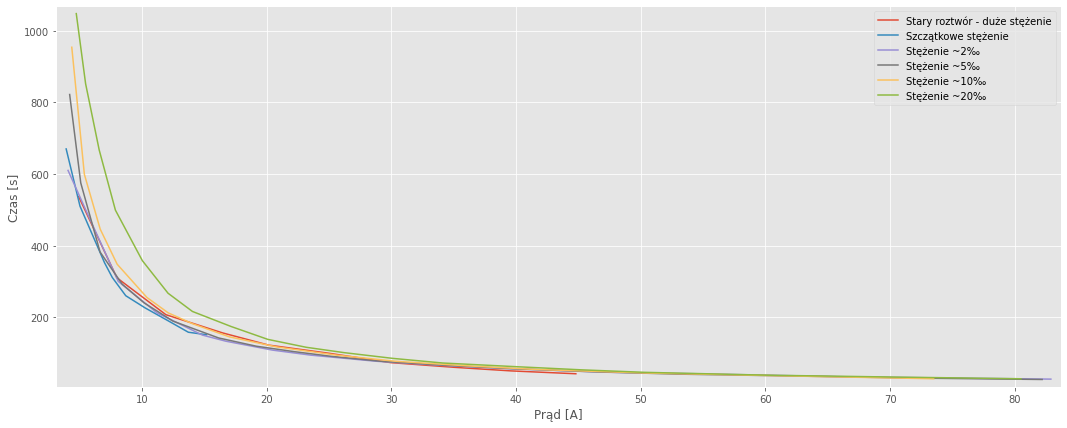

In [55]:
figure(1, figsize=(plt_length, plt_height)) 
plt.plot(Ix, secx)
plt.plot(I0, sec0)
plt.plot(I2, sec2)
plt.plot(I5, sec5)
plt.plot(I10, sec10)
plt.plot(I20, sec20)
plt.xlabel("Prąd [A]")
plt.ylabel("Czas [s]")
plt.legend(["Stary roztwór - duże stężenie", "Szczątkowe stężenie", "Stężenie ~2‰", "Stężenie ~5‰", "Stężenie ~10‰", "Stężenie ~20‰"])
plt.margins(0.01, 0.02)
plt.savefig("./png/eclz-static-time.png", bbox_inches = 'tight')
plt.savefig("./pdf/eclz-static-time.pdf", bbox_inches = 'tight')
plt.show()

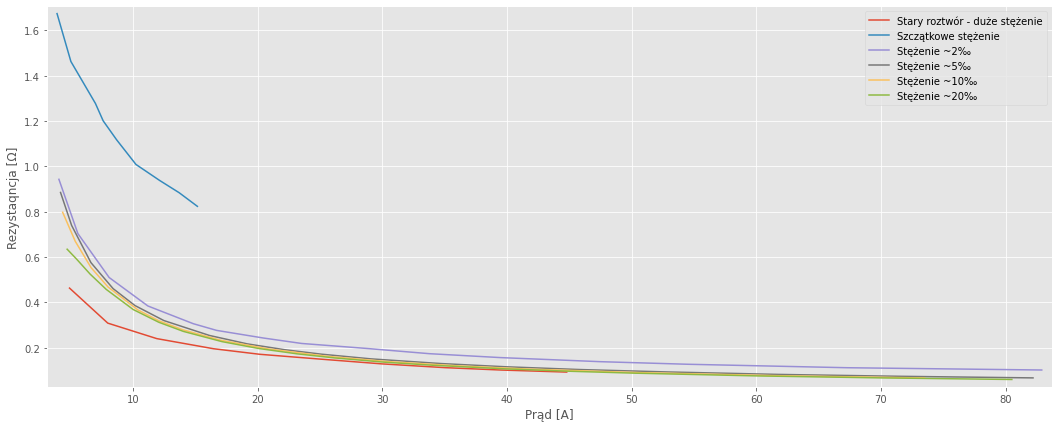

In [56]:
figure(1, figsize=(plt_length, plt_height)) 
plt.plot(Ix, Rx)
plt.plot(I0, R0)
plt.plot(I2, R2)
plt.plot(I5, R5)
plt.plot(I10, R10)
plt.plot(I20, R20)
plt.xlabel("Prąd [A]")
plt.ylabel("Rezystaqncja [Ω]")
plt.legend(["Stary roztwór - duże stężenie", "Szczątkowe stężenie", "Stężenie ~2‰", "Stężenie ~5‰", "Stężenie ~10‰", "Stężenie ~20‰"])
plt.margins(0.01, 0.02)
plt.savefig("./png/eclz-static-ohm.png", bbox_inches = 'tight')
plt.savefig("./pdf/eclz-static-ohm.pdf", bbox_inches = 'tight')
plt.show()

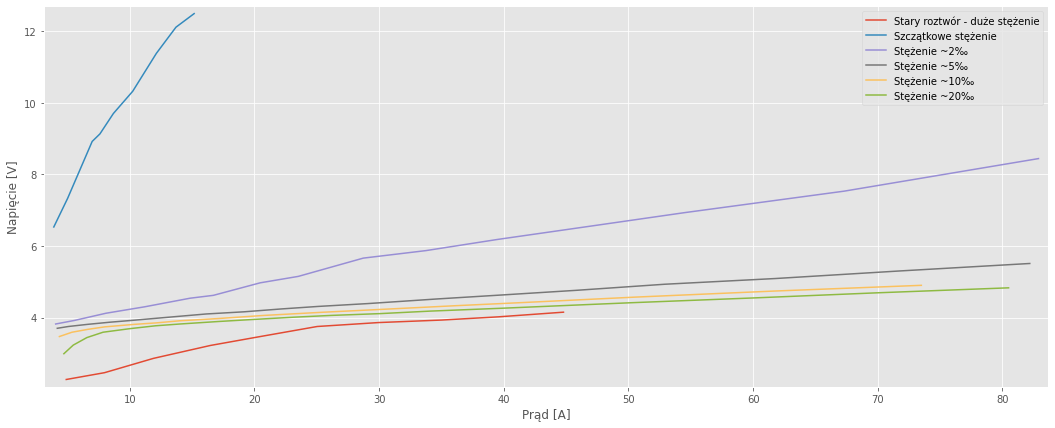

In [57]:
figure(1, figsize=(plt_length, plt_height)) 
plt.plot(Ix, Ux)
plt.plot(I0, U0)
plt.plot(I2, U2)
plt.plot(I5, U5)
plt.plot(I10, U10)
plt.plot(I20, U20)
plt.xlabel("Prąd [A]")
plt.ylabel("Napięcie [V]")
plt.legend(["Stary roztwór - duże stężenie", "Szczątkowe stężenie", "Stężenie ~2‰", "Stężenie ~5‰", "Stężenie ~10‰", "Stężenie ~20‰"])
plt.margins(0.01, 0.02)
plt.savefig("./png/eclz-static-volt.png", bbox_inches = 'tight')
plt.savefig("./pdf/eclz-static-volt.pdf", bbox_inches = 'tight')
plt.show()

In [59]:
freq = [100, 1000, 10000, 100000, 200000]
koh = [-1, 0, 2, 5, 10, 20]

Z = [
    [0.030, 0.032, 0.313, 3.023, 5.98],
    [0.69, 0.68, 0.76, 2.51, 3.4],
    [0.121, 0.050, 0.287, 2.736, 5.491],
    [0.049, 0.034, 0.287, 2.773, 5.489],
    [0.032, 0.033, 0.305, 2.933, 5.800],
    [0.037, 0.030, 0.284, 2.734, 5.413]
]

Fi = [
    [-56.3, 64.6, 85.90, 88.67, 88.86],
    [-4.821, 1.688, 20.45, 39.91, 26.64],
    [-10.44, 29.93, 79.99, 87.96, 88.49],
    [-40.01, 41.91, 83.83, 88.39, 88.69],
    [-46.74, 57.12, 85.01, 88.41, 88.67],
    [-54.87, 56.99, 85.13, 88.55, 88.79]
]

Ls = [
    [-39.6, 4.66, 4.97, 4.81, 4.764],
    [-94, 3.22, 4.2, 2.56, 1.217],
    [-48.12, 3.946, 4.5, 4.352, 4.308],
    [-50.28, 3.628, 4.559, 4.411, 4.365],
    [-37.99, 4.493, 4.842, 4.666, 4.615],
    [-45.72, 4.032, 4.495, 4.345, 4.306]
]

ESR = [
    [0.0166, 0.0138, 0.0701, 0.119, 0.12],
    [0.69, 0.69, 0.71, 1.92, 3.05],
    [0.0512, 0.0437, 0.0506, 0.0973, 0.1446],
    [0.0382, 0.0254, 0.0309, 0.077, 0.126],
    [0.0223, 0.0181, 0.0265, 0.0806, 0.1356],
    [0.0216, 0.0165, 0.0245, 0.0684, 0.1139]
]

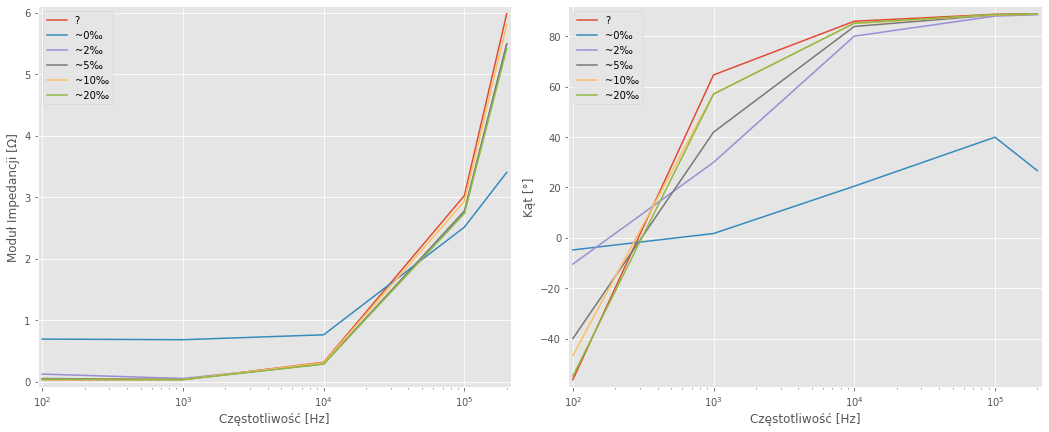

In [60]:
figure, ch = plt.subplots(1, 2)
figure.set_figheight(plt_height)
figure.set_figwidth(plt_length)
figure.subplots_adjust(wspace = 0.12, hspace = 0.15) 

for i in range(len(koh)):
    ch[0].plot(freq, Z[i])
    ch[1].plot(freq, Fi[i])
    
ch[0].set_xlabel("Częstotliwość [Hz]")
ch[0].set_ylabel("Moduł Impedancji [Ω]")
ch[0].legend(["?", "~0‰", "~2‰", "~5‰", "~10‰", "~20‰"])
ch[0].margins(0.01, 0.02)
ch[0].set_xscale('log')

ch[1].set_xlabel("Częstotliwość [Hz]")
ch[1].set_ylabel("Kąt [°]")
ch[1].legend(["?", "~0‰", "~2‰", "~5‰", "~10‰", "~20‰"])
ch[1].margins(0.01, 0.02)
ch[1].set_xscale('log')

plt.savefig("./png/eclz-rlc-zfi.png", bbox_inches = 'tight')
plt.savefig("./pdf/eclz-rlc-zfi.pdf", bbox_inches = 'tight')
plt.show()

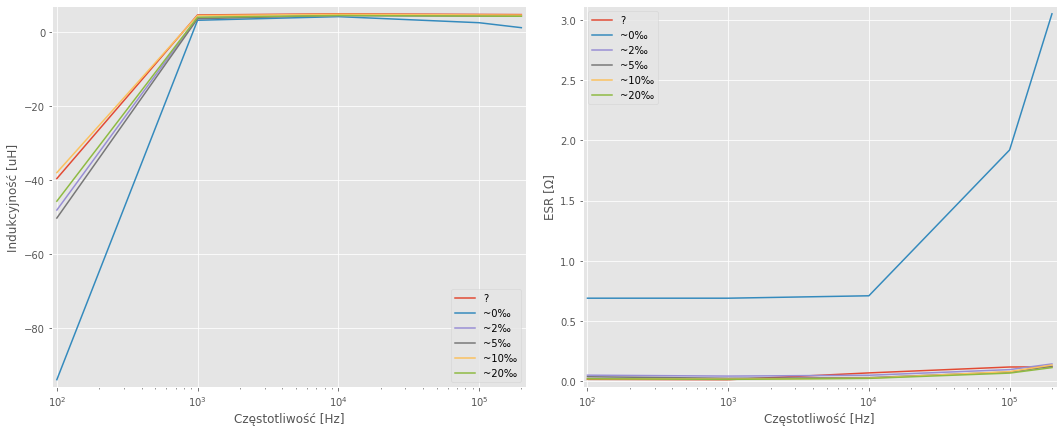

In [62]:
figure, ch = plt.subplots(1, 2)
figure.set_figheight(plt_height)
figure.set_figwidth(plt_length)
figure.subplots_adjust(wspace = 0.12, hspace = 0.15) 

for i in range(len(koh)):
    ch[0].plot(freq, Ls[i])
    ch[1].plot(freq, ESR[i])
    
ch[0].set_xlabel("Częstotliwość [Hz]")
ch[0].set_ylabel("Indukcyjność [uH]")
ch[0].legend(["?", "~0‰", "~2‰", "~5‰", "~10‰", "~20‰"])
ch[0].margins(0.01, 0.02)
ch[0].set_xscale('log')

ch[1].set_xlabel("Częstotliwość [Hz]")
ch[1].set_ylabel("ESR [Ω]")
ch[1].legend(["?", "~0‰", "~2‰", "~5‰", "~10‰", "~20‰"])
ch[1].margins(0.01, 0.02)
ch[1].set_xscale('log')

plt.savefig("./png/eclz-rlc-lsesr.png", bbox_inches = 'tight')
plt.savefig("./pdf/eclz-rlc-lsesr.pdf", bbox_inches = 'tight')
plt.show()